In [4]:
import numpy as np
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

**Read-In and Scale Data**

In [5]:
dataDir = 'data/'
train = pd.read_csv(dataDir+'creditcard.csv').values

X =  MinMaxScaler(feature_range=(0, 1)).fit_transform(train[:,:29])
y = train[:,30]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

**Automated Num Learner Test**

In [ ]:
def run_numLearner_test(learner_counts, X_train, X_test, y_train, y_test, subsample=1):
    num_trials = len(learner_counts)
    results = np.zeros((num_trials, 4))

    for index, num_learners in enumerate(learner_counts):
        model = GradientBoostingClassifier(max_features='auto', n_estimators=num_learners,verbose=1, learning_rate=0.1,subsample=subsample, loss='exponential')
        model.fit(X_train,y_train)
        print(model.n_estimators)
        ypr = model.predict(X_test)
        results[index, :] = np.array([num_learners, f1_score(ypr,y_test), recall_score(ypr,y_test), precision_score(ypr,y_test)])
    
    return(results)

**Automated Subset Size Test**

In [7]:
def run_subsetSize_test(sizes, X_train, X_test, y_train, y_test):
    results = np.zeros((len(sizes), 4))
    
    for index, subset_size in enumerate(sizes):
        model = GradientBoostingClassifier(n_estimators=500, verbose=1, learning_rate=0.1, subsample=subset_size, loss='exponential')
        model.fit(X_train,y_train)
        ypr = model.predict(X_test)
        results[index, :] = np.array([subset_size, f1_score(ypr,y_test), recall_score(ypr,y_test), precision_score(ypr,y_test)])
    
    return(results)

**Test Result Plotter**

In [8]:
def plot_test(results, title, x_label):
    plt.figure(1, figsize=(20, 10))
    indep_var = results[:, 0]
    f1_scores = results[:, 1]
    recall_scores = results[:, 2]
    precision_scores = results[:, 3]
    
    plt.xlabel(x_label)
    plt.ylabel('Metrics')
    plt.title(title)
    plt.plot(indep_var, recall_scores, label='Validation Recall')
    plt.plot(indep_var, f1_scores, label='Validation F1')
    plt.plot(indep_var, precision_scores, label='Validation Precision')
    plt.legend()

In [3]:
numLearnerTest_10_3000_subsample100 = run_numLearner_test([100, 500, 1000, 1500, 2000, 2500], X_train, X_test, y_train, y_test, subsample=1, warm_start=False)

NameError: name 'X_train' is not defined

In [64]:
numLearnerTest_10_3000_subsample80 = run_numLearner_test([10, 50, 100, 500, 1000, 1500, 2000, 2500, 3000], X_train, X_test, y_train, y_test, subsample=0.8, warm_start=False)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0794           0.0055           15.22s
         2           0.0727           0.0052           13.07s
         3           0.0690           0.0042           10.82s
         4           0.0643           0.0030            8.54s
         5           0.0617           0.0039            6.73s
         6           0.0604           0.0030            5.17s
         7           0.0562           0.0024            3.77s
         8           0.0500           0.0026            2.46s
         9           0.0512           0.0024            1.21s
        10           0.0493           0.0021            0.00s
10


/home/machinator/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/machinator/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0787           0.0058           49.03s
         2           0.0744           0.0047           50.51s
         3           0.0668           0.0047           48.57s
         4           0.0654           0.0030           49.28s
         5           0.0628           0.0033           46.95s
         6           0.0583           0.0028           46.71s
         7           0.0557           0.0026           44.51s
         8           0.0538           0.0025           44.67s
         9           0.0511           0.0022           43.56s
        10           0.0509           0.0019           42.34s
        20           0.0370           0.0004           30.22s
        30           0.0330           0.0003           19.98s
        40           0.0288           0.0001           10.07s
        50           0.0253          -0.0000            0.00s
50
      Iter       Train Loss      OOB Improve   Remaining Time 
   

        60           0.0224          -0.0000           31.27m
        70           0.0209          -0.0000           31.04m
        80           0.0176          -0.0001           30.88m
        90           0.0189          -0.0000           30.78m
       100           0.0181          -0.0001           30.69m
       200           0.0090          -0.0001           29.19m
       300           0.0063          -0.0001           27.56m
       400           0.0041          -0.0000           25.98m
       500           0.0033          -0.0000           24.28m
       600           0.0023          -0.0000           22.65m
       700           0.0017          -0.0000           21.02m
       800           0.0012          -0.0000           19.43m
       900           0.0009          -0.0000           17.87m
      1000           0.0007          -0.0000           16.27m
      2000           0.0000          -0.0000            0.00s
2000
      Iter       Train Loss      OOB Improve   Remaining Time 
  

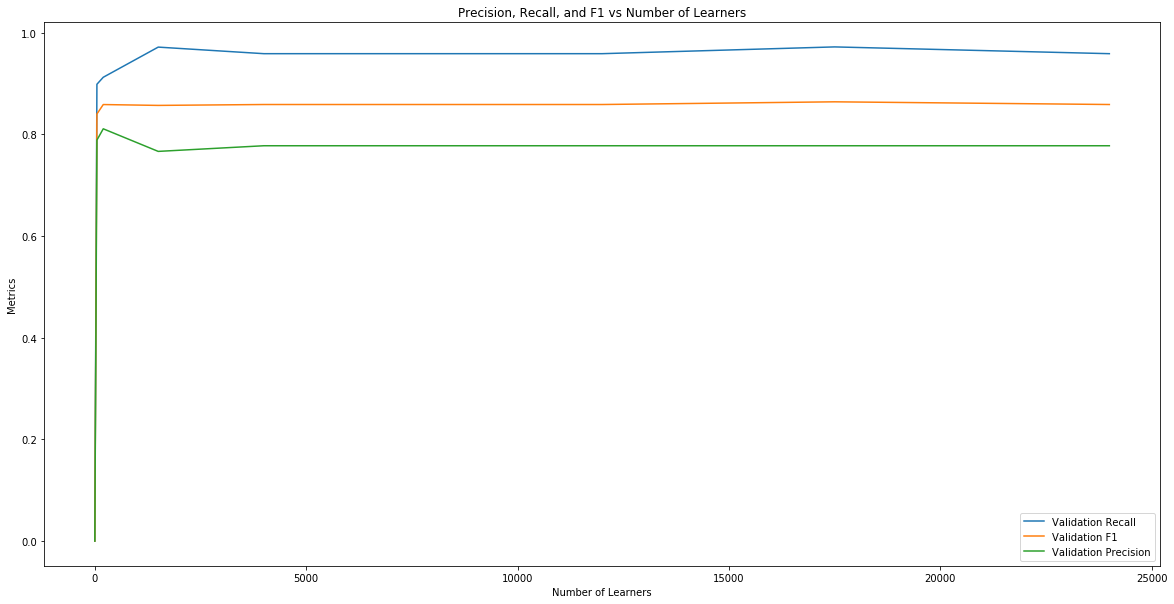

In [66]:
plot_test(numLearnerTest_10_3000_subsample80, 'Precision, Recall, and F1 vs Number of Learners', 'Number of Learners')

In [ ]:
subsetSize_test = run_subsetSize_test([0.1, 0.2, 0.4, 0.6, 0.8, 1], X_train, X_test, y_train, y_test)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0779           0.0047            3.00m
         2           0.0660           0.0043            2.81m
         3           0.0666           0.0043            2.77m
         4           0.0660           0.0031            2.74m
         5           0.0632           0.0037            3.04m
         6           0.0595           0.0024            2.96m
         7           0.0481           0.0021            2.88m
         8           0.0558           0.0017            2.81m
         9           0.0527           0.0016            2.79m
        10           0.0497           0.0010            2.76m
        20           0.0430           0.0004            3.01m
        30           0.0405           0.0007            2.83m
        40           0.0297           0.0003            2.63m
        50           0.0361           0.0001            2.55m
        60           0.0468           0.0017            2.42m
       

In [ ]:
plot_test(subsetSize_test, 'Precision, Recall, and F1 vs Subset Size', 'Subset Size')